# I. Entendendo a problemática
**I.I Companhia de doenças cardiovasculares**


*   A companhia de doenças cardiovasculares é uma companhia especializadas em detectar problemas de coração antecipadamente por um certo valor.
*   Normalmente, os diagnósticos de doenças cardiovasculares são feitos pela companhia manualmente, com uma acurácia média de 55% a 65% variando de acordo com a complexidade do diagnóstico.
*   Os especialistas se dividem em turnos para que a jornada se torne menos exaustiva e minimize o risco de erros.
*   O custo de cada diagnóstico, incluindo os aparelhos e folha de pagamento dos analistas gira em torno de $1.000,00

**I.II O Desafio**


*   O Desafio do Cientista de Dados com a ferramenta, é aumentar a acurácia média das previsões e diminuir os erros humanos envolvidos no processo.
*   Diminuir o valor gasto com equipamentos e folha de pagamento.

I.III **Data Frame**


*   Foi disponibilizado um DataFrame com dados coletados durante algum tempo de 70.000 (setenta mil)  diferentes pacientes ja atendidos pela companhia, com alguns dados [id, idade, sexo, altura, peso, pressão sistolica, pressão diastolica, colesterol, glicose, fumante, alcoolismo, atvfis, doenca]










# 0.0 Imports necessários e pré-definições

**0.1 Imports**

In [ ]:
import pandas as pd
import seaborn as sns
import numpy   as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from IPython.display       import Image
from IPython.core.display  import HTML
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.subplots import make_subplots

**0.2 Pré- Definições**

In [ ]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline

    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24

    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )

    sns.set()

jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


In [ ]:
# Criando algumas condicionais para a variavel idade pra futura visualização dos dados
# https://educador.brasilescola.uol.com.br/estrategias-ensino/faixa-etaria-populacao-brasileira.htm
# de acordo com o brasil escola as faixas etárias no brasil são jovens 0 a 19 anos, Adultos 20 a 59 anos, idosos 59+

def getFaixaEtaria(idade):
    if idade <= 19:
        faixaetaria = "Jovem"
    elif idade > 19 and idade <= 59:
        faixaetaria = "Adultos"
    else:
        faixaetaria = "Idosos"

    return faixaetaria

In [ ]:
# Criando condicional para a variavel peso pra futura visualização de dos dados
# https://www.tjpb.jus.br/vida-e-saude/dica-de-nutricao/conheca-sua-faixa-de-peso-saudavel
# de acordo com o tj temos que calcular o imc para classificar em normal, pré obesidade, obesidade grau 1, obesidade grau 2, obesidade grau 3
# IMC = peso / (altura)2

def calcIMC(peso, altura):
    imc = np.round(peso / (altura**2), 1)
    return imc

def catIMC(imc):
    peso_imc = ""  # Valor padrão

    if imc < 18.5:
        peso_imc = "Abaixo"

    elif imc >= 25 and imc <= 29.9:
        peso_imc = "Normal"

    elif imc >= 30 and imc <= 34.9:
        peso_imc = "Obesidade 1"

    elif imc >= 35 and imc <= 39.9:
        peso_imc = "Obesidade 2"

    elif imc >= 40.0:
        peso_imc = "Obesidade 3"

    return peso_imc



In [ ]:
def getPressaoSistolica(pressao_sistolica):
    if pressao_sistolica <= 110:
        PressaoMaxima = "Baixa"
    elif pressao_sistolica > 110 and pressao_sistolica <= 130:
        PressaoMaxima = "Normal"
    else:
        PressaoMaxima = "Alta"

    return PressaoMaxima

In [ ]:
def getPressaoDiastolica(pressão_diastolica):
    if pressão_diastolica <= 65:
        PressaoMinima = "Baixa"
    elif pressão_diastolica > 65 and pressão_diastolica <= 90:
        PressaoMinima = "Normal"
    else:
        PressaoMinima = "Alta"

    return PressaoMinima

# 1.0 Descrição dos dados

In [ ]:
train = pd.read_csv("cardio_train.csv", sep=";", low_memory=False)

In [ ]:
train.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
train.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


# 1.1 Renomeando Colunas

In [ ]:
train.columns = ["id", "idade", "sexo", "altura", "peso", "pressão_sistolica", "pressão_diastolica", "colesterol", "glicose", "fumante", "alcoolismo", "atvfis", "doenca"]

In [ ]:
train.head()

,id,idade,sexo,altura,peso,pressão_sistolica,pressão_diastolica,colesterol,glicose,fumante,alcoolismo,atvfis,doenca
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# 1.2 Dimensões do DataFrame

In [ ]:
num_dados = train.shape[0]
num_colunas = train.shape[1]

print(train.columns)
print( )
print("O DataFrame possui", num_colunas, "colunas.")
print("O DataFrame possui", num_dados, "dados.")

Index(['id', 'idade', 'sexo', 'altura', 'peso', 'pressão_sistolica',
       'pressão_diastolica', 'colesterol', 'glicose', 'fumante', 'alcoolismo',
       'atvfis', 'doenca'],
      dtype='object')

O DataFrame possui 13 colunas.
O DataFrame possui 70000 dados.


**1.3 Tipos de dados**

Transformarei os valores que estão como valores binários para string, facilitando assim a visualização dos dados.

In [ ]:
train["colesterol"] = train["colesterol"].map({1: "normal", 2: "acima do normal", 3: "muito acima normal"})
train["glicose"] = train["glicose"].map({1: "normal", 2: "acima do normal", 3: "muito acima normal"})
train["fumante"] = train["fumante"].map({0: "não", 1: "sim"})
train["alcoolismo"] = train["alcoolismo"].map({0: "não", 1: "sim"})
train["atvfis"] = train["atvfis"].map({0: "não", 1: "sim"})
train["doenca"] = train["doenca"].map({0: "não", 1: "sim"})
train["sexo"] = train["sexo"].map({1: "mulher", 2: "homem"})

In [ ]:
train.dtypes

id                      int64
idade                   int64
sexo                   object
altura                  int64
peso                  float64
pressão_sistolica       int64
pressão_diastolica      int64
colesterol             object
glicose                object
fumante                object
alcoolismo             object
atvfis                 object
doenca                 object
dtype: object

In [ ]:
train.head()

,id,idade,sexo,altura,peso,pressão_sistolica,pressão_diastolica,colesterol,glicose,fumante,alcoolismo,atvfis,doenca
0,0,18393,homem,168,62.0,110,80,normal,normal,não,não,sim,não
1,1,20228,mulher,156,85.0,140,90,muito acima normal,normal,não,não,sim,sim
2,2,18857,mulher,165,64.0,130,70,muito acima normal,normal,não,não,não,sim
3,3,17623,homem,169,82.0,150,100,normal,normal,não,não,sim,sim
4,4,17474,mulher,156,56.0,100,60,normal,normal,não,não,não,não


**1.4 Checando Valores Faltantes**

In [ ]:
train.isna().sum()

id                    0
idade                 0
sexo                  0
altura                0
peso                  0
pressão_sistolica     0
pressão_diastolica    0
colesterol            0
glicose               0
fumante               0
alcoolismo            0
atvfis                0
doenca                0
dtype: int64

# 1.5 Atributos

Separarei em atributos numéricos e atributos categóricos para que fique mais facil de entender os dados.

In [ ]:
numericos = train[["peso", "altura", "pressão_sistolica","pressão_diastolica","idade"]]
categoricos = train[["colesterol", "sexo", "glicose", "fumante", "alcoolismo", "atvfis", "doenca"]]

**1.5.1 Atributos numéricos**

In [ ]:
#Entendendo melhor os dados numéricos usando o método describe

numericos.describe()

,peso,altura,pressão_sistolica,pressão_diastolica,idade
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,74.205690,164.359229,128.817286,96.630414,19468.865814
std,14.395757,8.210126,154.011419,188.472530,2467.251667
min,10.000000,55.000000,-150.000000,-70.000000,10798.000000
25%,65.000000,159.000000,120.000000,80.000000,17664.000000
50%,72.000000,165.000000,120.000000,80.000000,19703.000000
75%,82.000000,170.000000,140.000000,90.000000,21327.000000
max,200.000000,250.000000,16020.000000,11000.000000,23713.000000


**1.5.2 Atributos categóricos**

In [ ]:
#Entendendo melhor os dados categoricos(binários) usando o método describe

categoricos.describe()

,colesterol,sexo,glicose,fumante,alcoolismo,atvfis,doenca
count,70000,70000,70000,70000,70000,70000,70000
unique,3,2,3,2,2,2,2
top,normal,mulher,normal,não,não,sim,não
freq,52385,45530,59479,63831,66236,56261,35021


# 2.0 Criação de hipótese



*   H1 : Quanto mais velha uma pessoa, maior a probabilidade de ela ficar doente.
*   H2 : Quem fuma tem mais chance de ficar doente.
*   H3 : Colesterol alto significa que a pessoa pode ter problemas cardíacos.
*   H4 : Quanto maior a pressão sistólica e diastólica, mais chance de ficar doente
*   H5 : Quem não faz atividade física pode ficar doente.
*   H6 : Quanto mais obesa uma pessoa for, maior será a chance de adoecer.



# 3.0 Análise de Dados

**3.1 Tratando variaveis**

In [ ]:
train['idade'] = train['idade'] / 365
train['faixaetaria'] = train["idade"].apply(getFaixaEtaria)

In [ ]:
getPressaoSistolica_lambda = lambda pressao_sistolica: "Baixa" if pressao_sistolica <= 110 else ("Normal" if pressao_sistolica <= 130 else "Alta")

In [ ]:
train['PressaoMaxima'] = train['pressão_sistolica'].apply(getPressaoSistolica)
train['PressaoMinima'] = train["pressão_diastolica"].apply(getPressaoDiastolica)

In [ ]:
train["IMC"] = train.apply(lambda row: calcIMC(row["peso"], row["altura"]/100), axis=1)
train["peso_imc"] = train["IMC"].apply(catIMC)

In [ ]:
df = train.copy()

**3.2 Plotando gráficos**

**3.2.1 Variavel de Resposta**

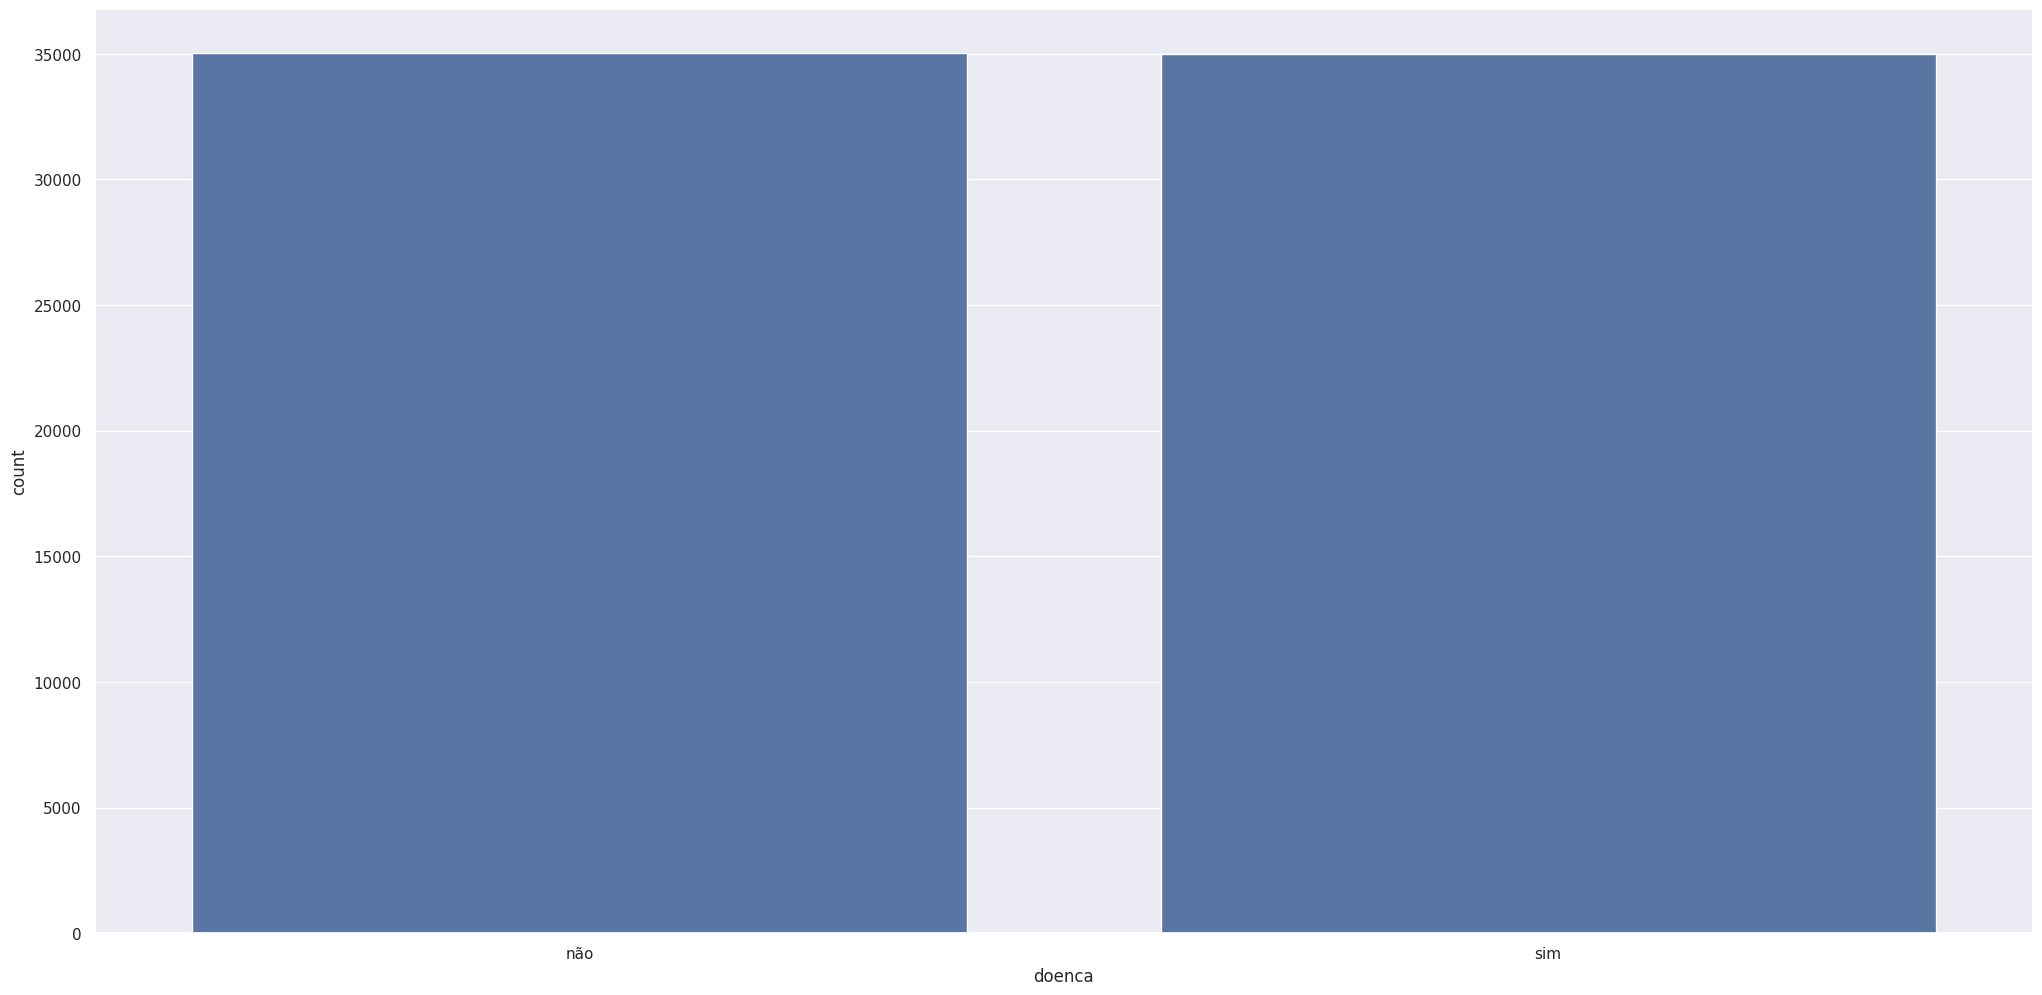

In [ ]:
sns.countplot(x="doenca", data=df);


**3.2.2 Variaveis categóricas**

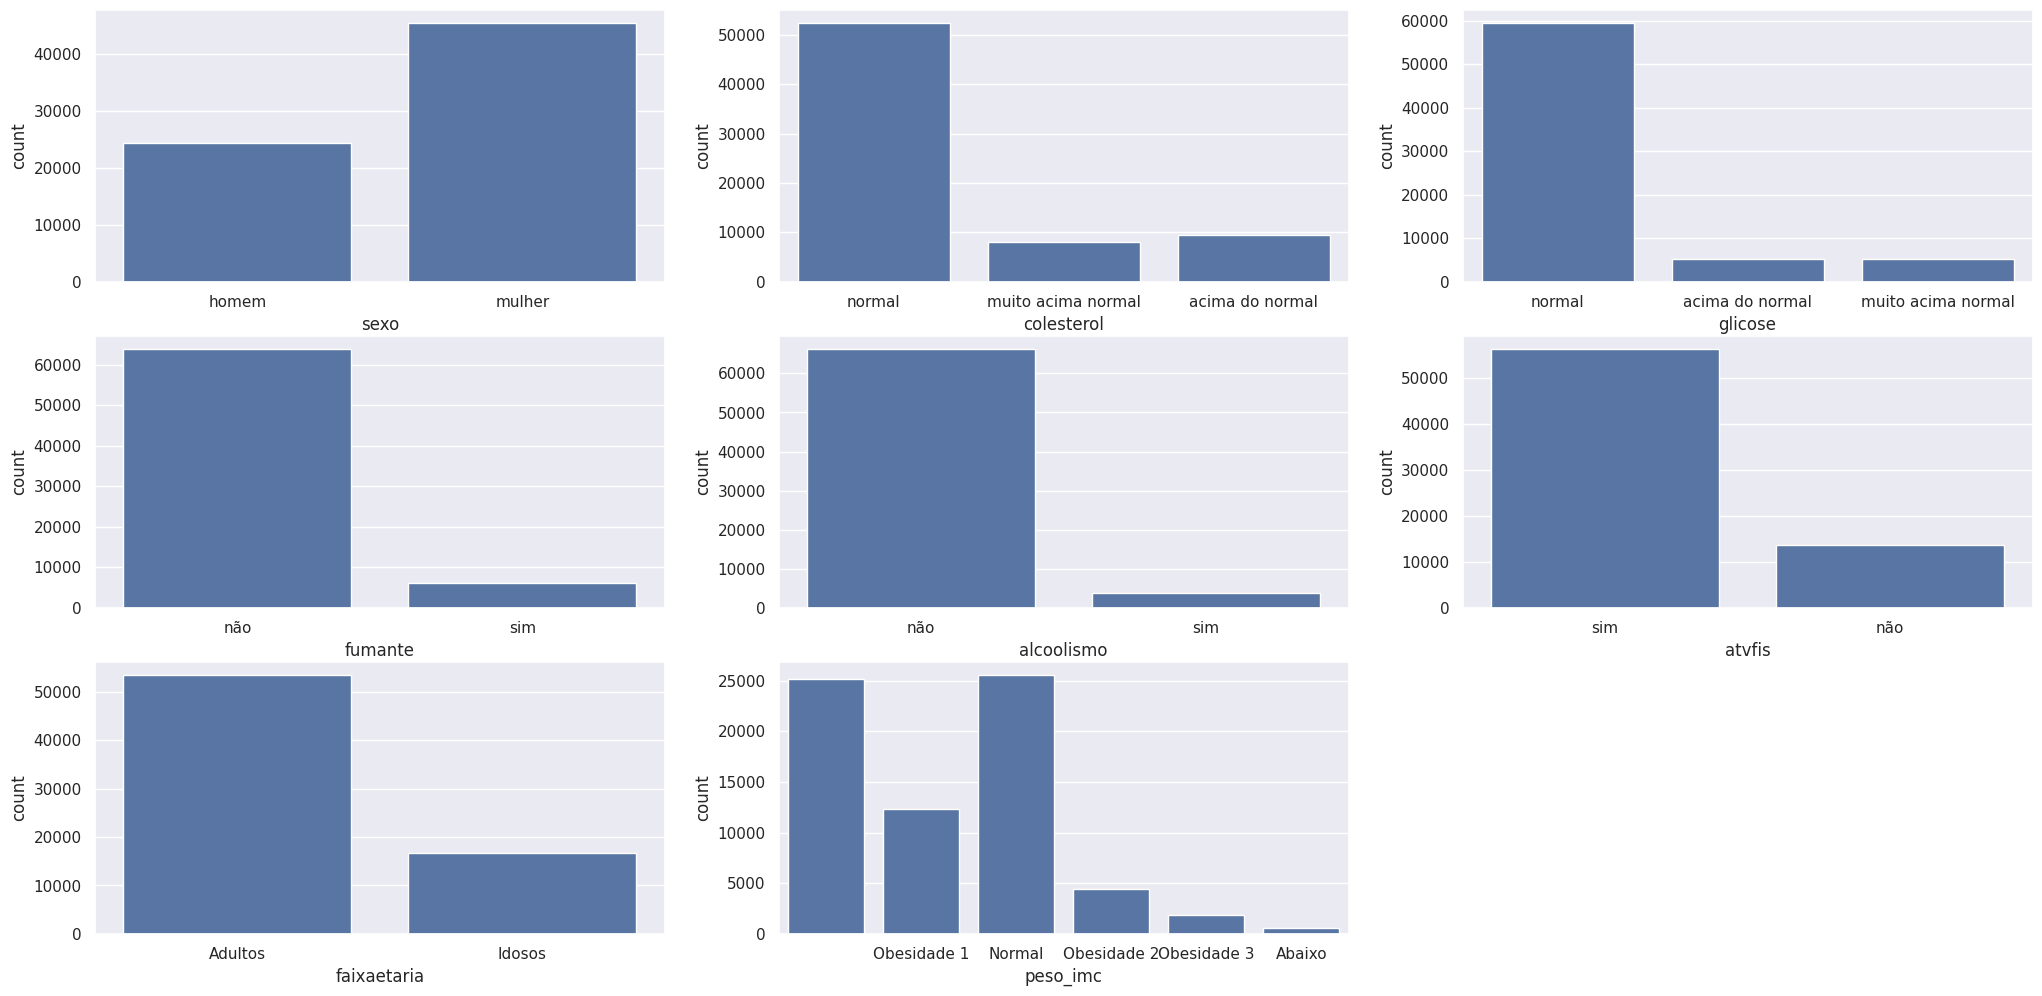

In [ ]:
cat = df.select_dtypes(include="object")

plt.subplot(3, 3, 1)
sns.countplot(x="sexo", data=cat);

plt.subplot(3, 3, 2)
sns.countplot(x="colesterol", data=cat);

plt.subplot(3, 3, 3)
sns.countplot(x="glicose", data=cat);

plt.subplot(3, 3, 4)
sns.countplot(x="fumante", data=cat);

plt.subplot(3, 3, 5)
sns.countplot(x="alcoolismo", data=cat);

plt.subplot(3, 3, 6)
sns.countplot(x="atvfis", data=cat);

plt.subplot(3, 3, 7)
sns.countplot(x="faixaetaria", data=cat);

plt.subplot(3, 3, 8)
sns.countplot(x="peso_imc", data=cat);

**3.2.3 Gafico BoxSplot**

In [ ]:
# Criar subplots com 6 linhas e 1 coluna
fig = make_subplots(rows=6, cols=1)

# Gráfico de boxplot com cores personalizadas
fig.add_trace(go.Box(x=df['idade'], name='Idade', marker_color='blue'), row=1, col=1)
fig.add_trace(go.Box(x=df['peso'], name='Peso', marker_color='green'), row=2, col=1) # Distribuído pela mediana
fig.add_trace(go.Box(x=df['pressão_sistolica'], name='Pressão Sistólica', marker_color='red'), row=3, col=1)
fig.add_trace(go.Box(x=df['pressão_diastolica'], name='Pressão Diastólica', marker_color='purple'), row=4, col=1)
fig.add_trace(go.Box(x=df['altura'], name='Altura', marker_color='orange'), row=5, col=1)

fig.update_layout(height=1200, title_text="Boxplots de Variáveis Contínuas")
fig.show()


Através destes boxplots, observamos que as variáveis altura, peso, pressão sistólica e pressão diastólica apresentam uma quantidade significativa de outliers, o que pode dificultar a interpretação dos dados. Notamos uma pequena variabilidade nas pressões sistólica e diastólica, enquanto as variáveis peso e altura exibem uma variabilidade consideravelmente maior.

# 3.3 Trabalhando hipóteses


**3.3.1 Hipótese 1**

**Quanto mais velha uma pessoa, maior a probabilidade de ela ficar doente?**

**Verdade**

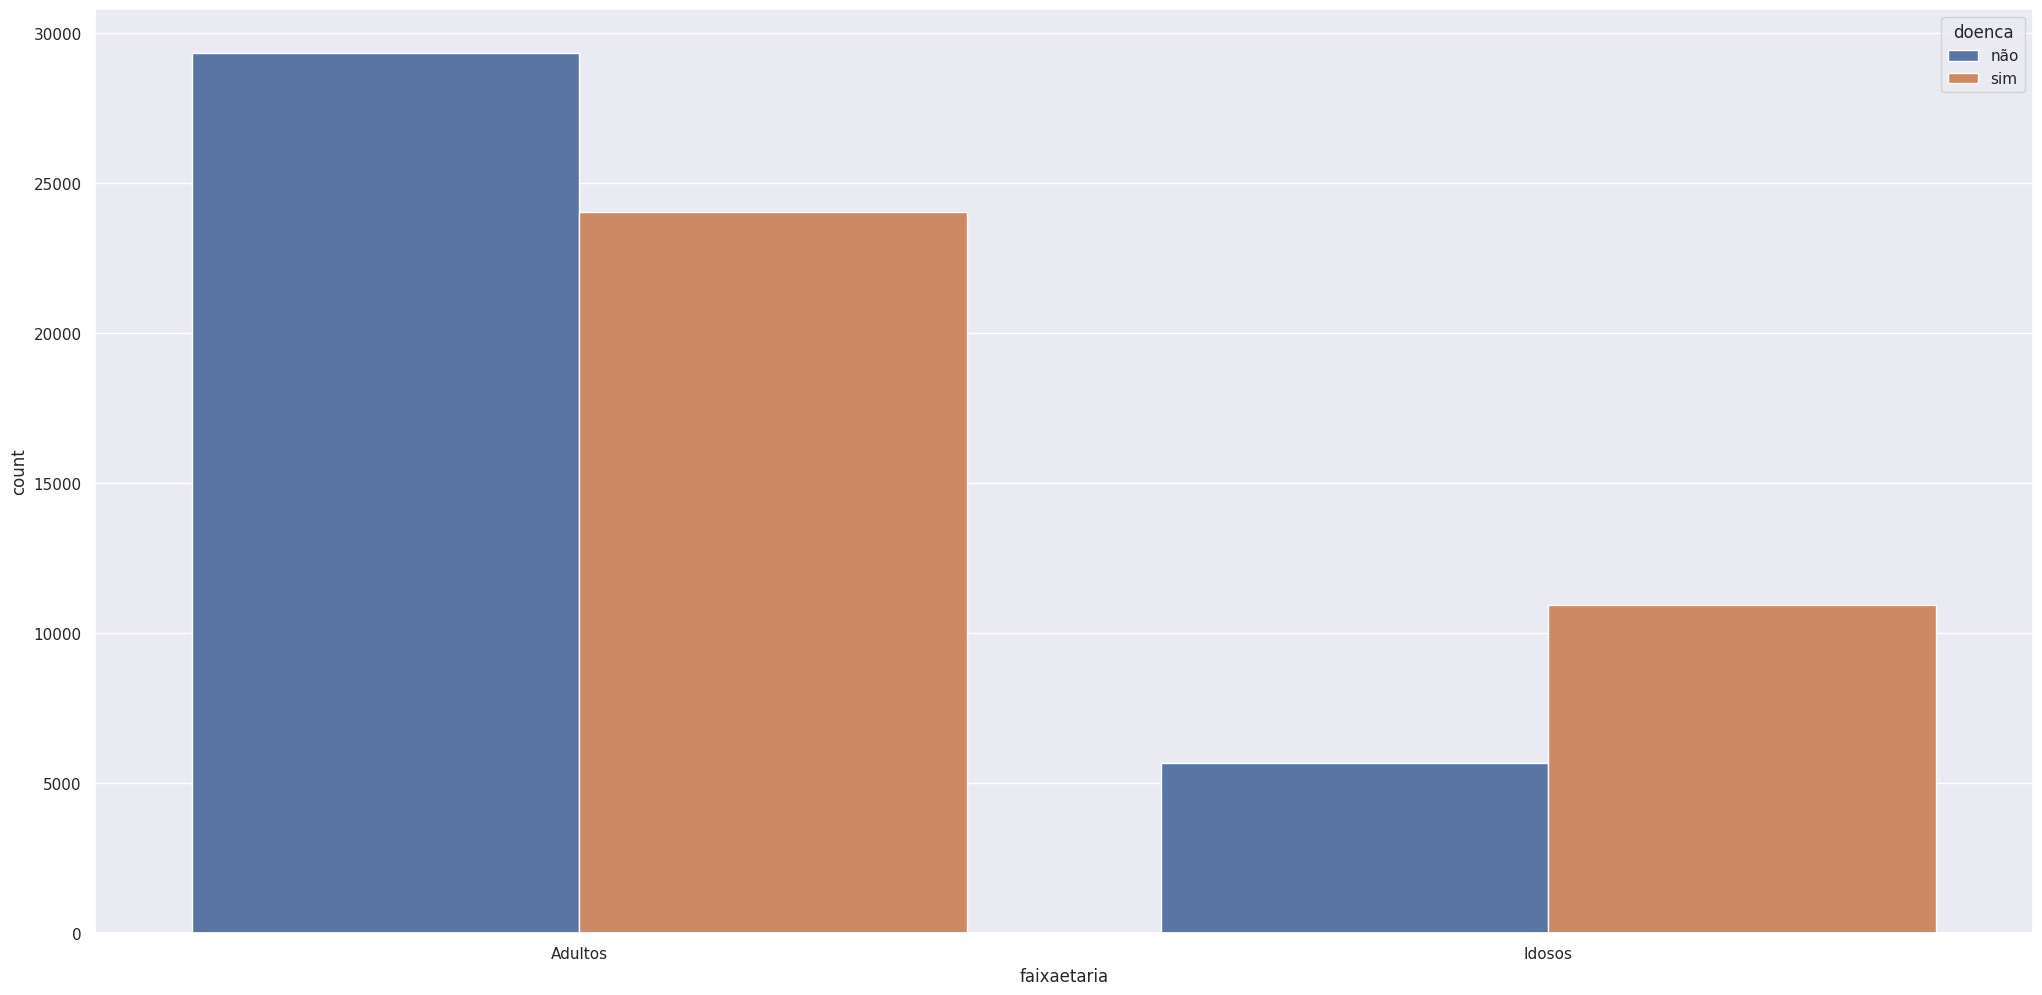

In [ ]:
sns.countplot(x="faixaetaria", data=df, hue="doenca");

**3.3.2 Hipótese 2**

**Quem fuma tem mais chance de ficar doente?**

**Mentira**

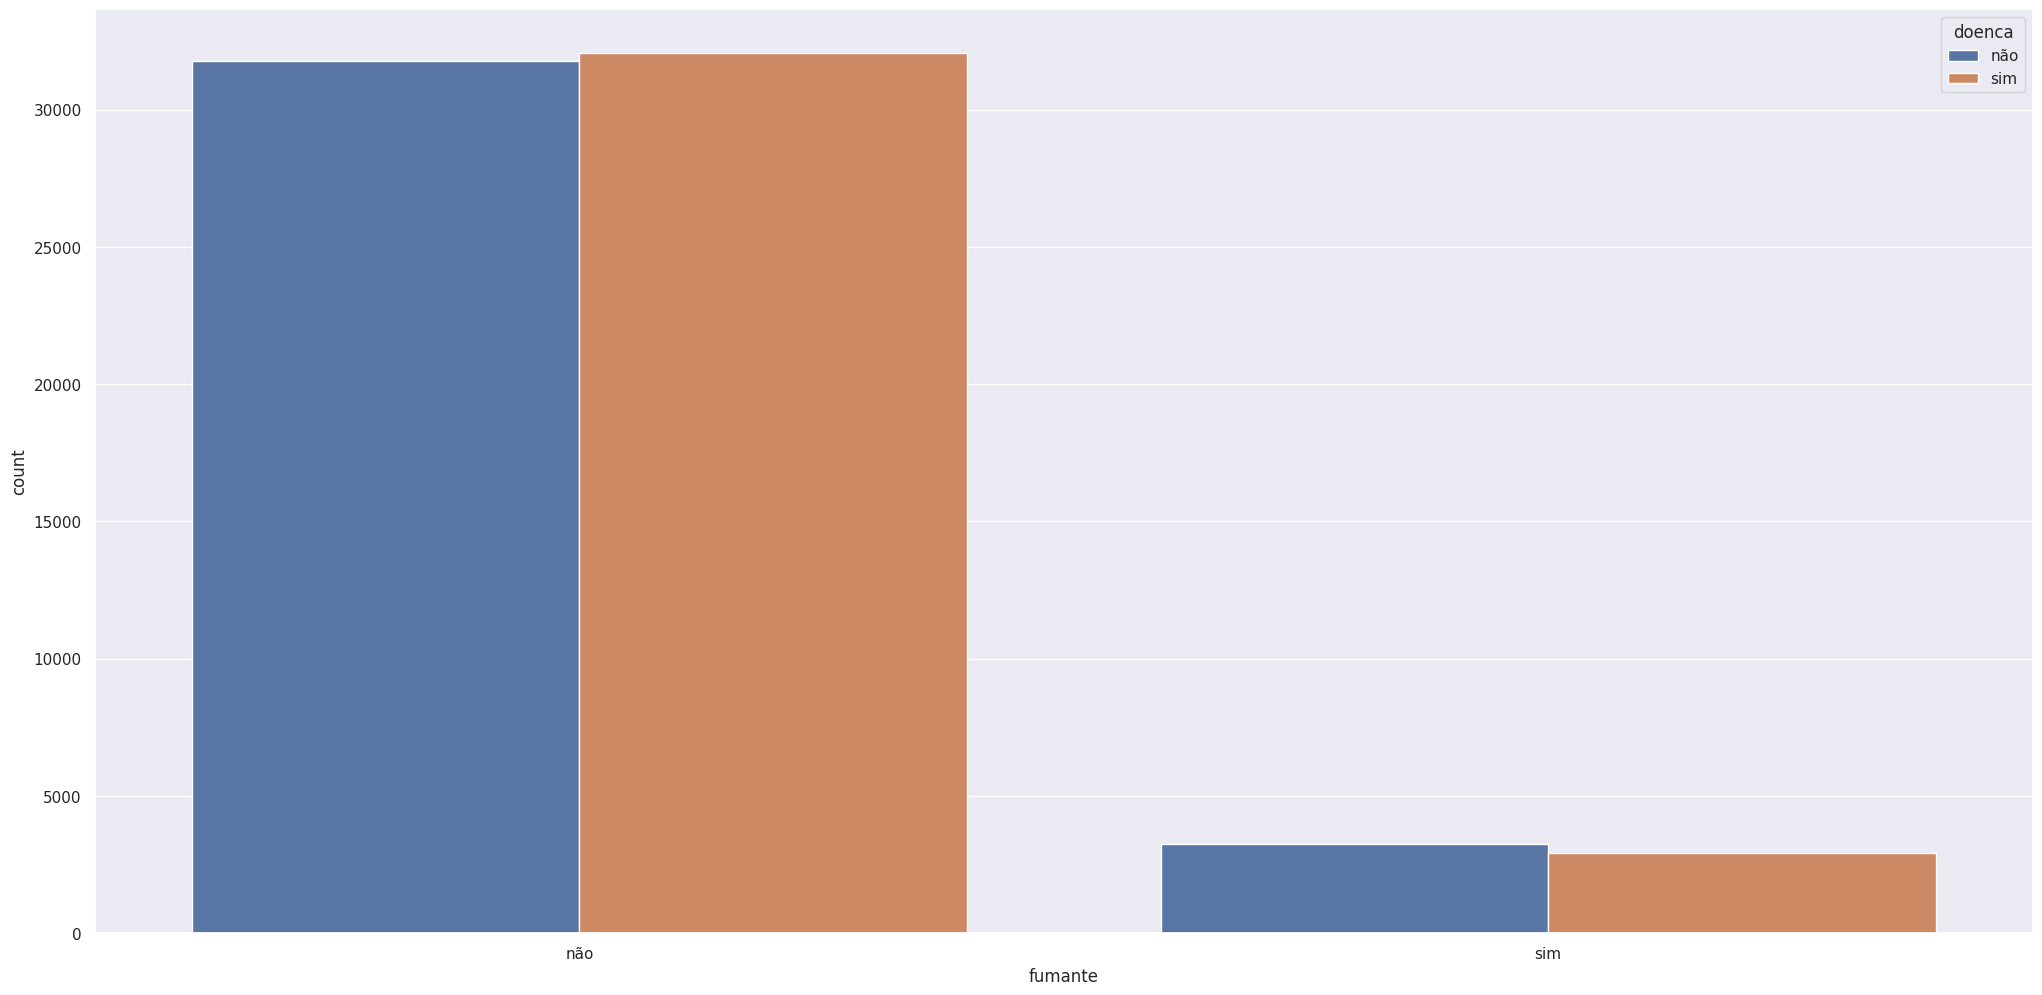

In [ ]:
# trabalhando com a segunda hipótese
# Quem fuma tem mais chance de ficar ter doença cardiovascular.
sns.countplot(x="fumante", data=df, hue="doenca");
#mentira

**3.3.3 Hipótese 3**

Colesterol alto significa que a pessoa pode ter problemas cardíacos

**Verdade**

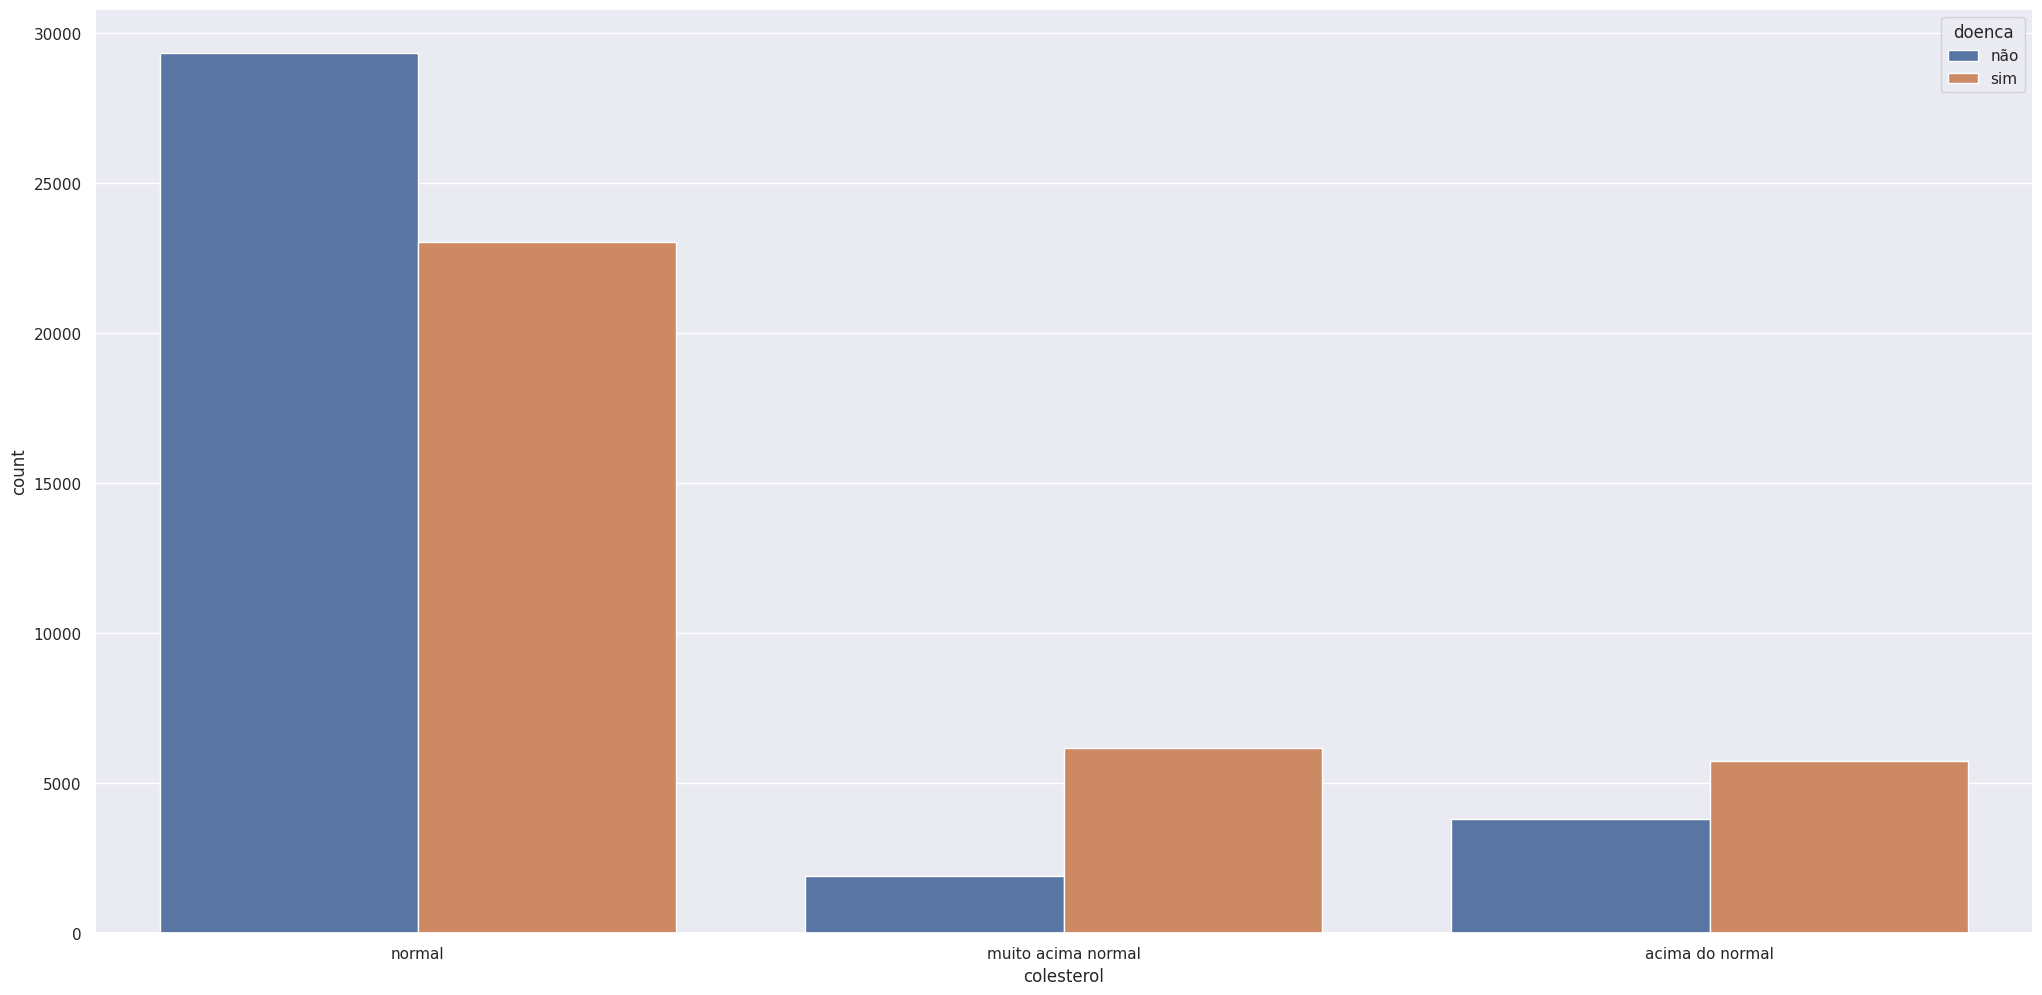

In [ ]:
sns.countplot(x="colesterol", data=df, hue="doenca");

**3.3.4 Hipótese 4**

Quanto maior a pressão sistólica e diastólica, mais chance de ficar doente

**Verdade**

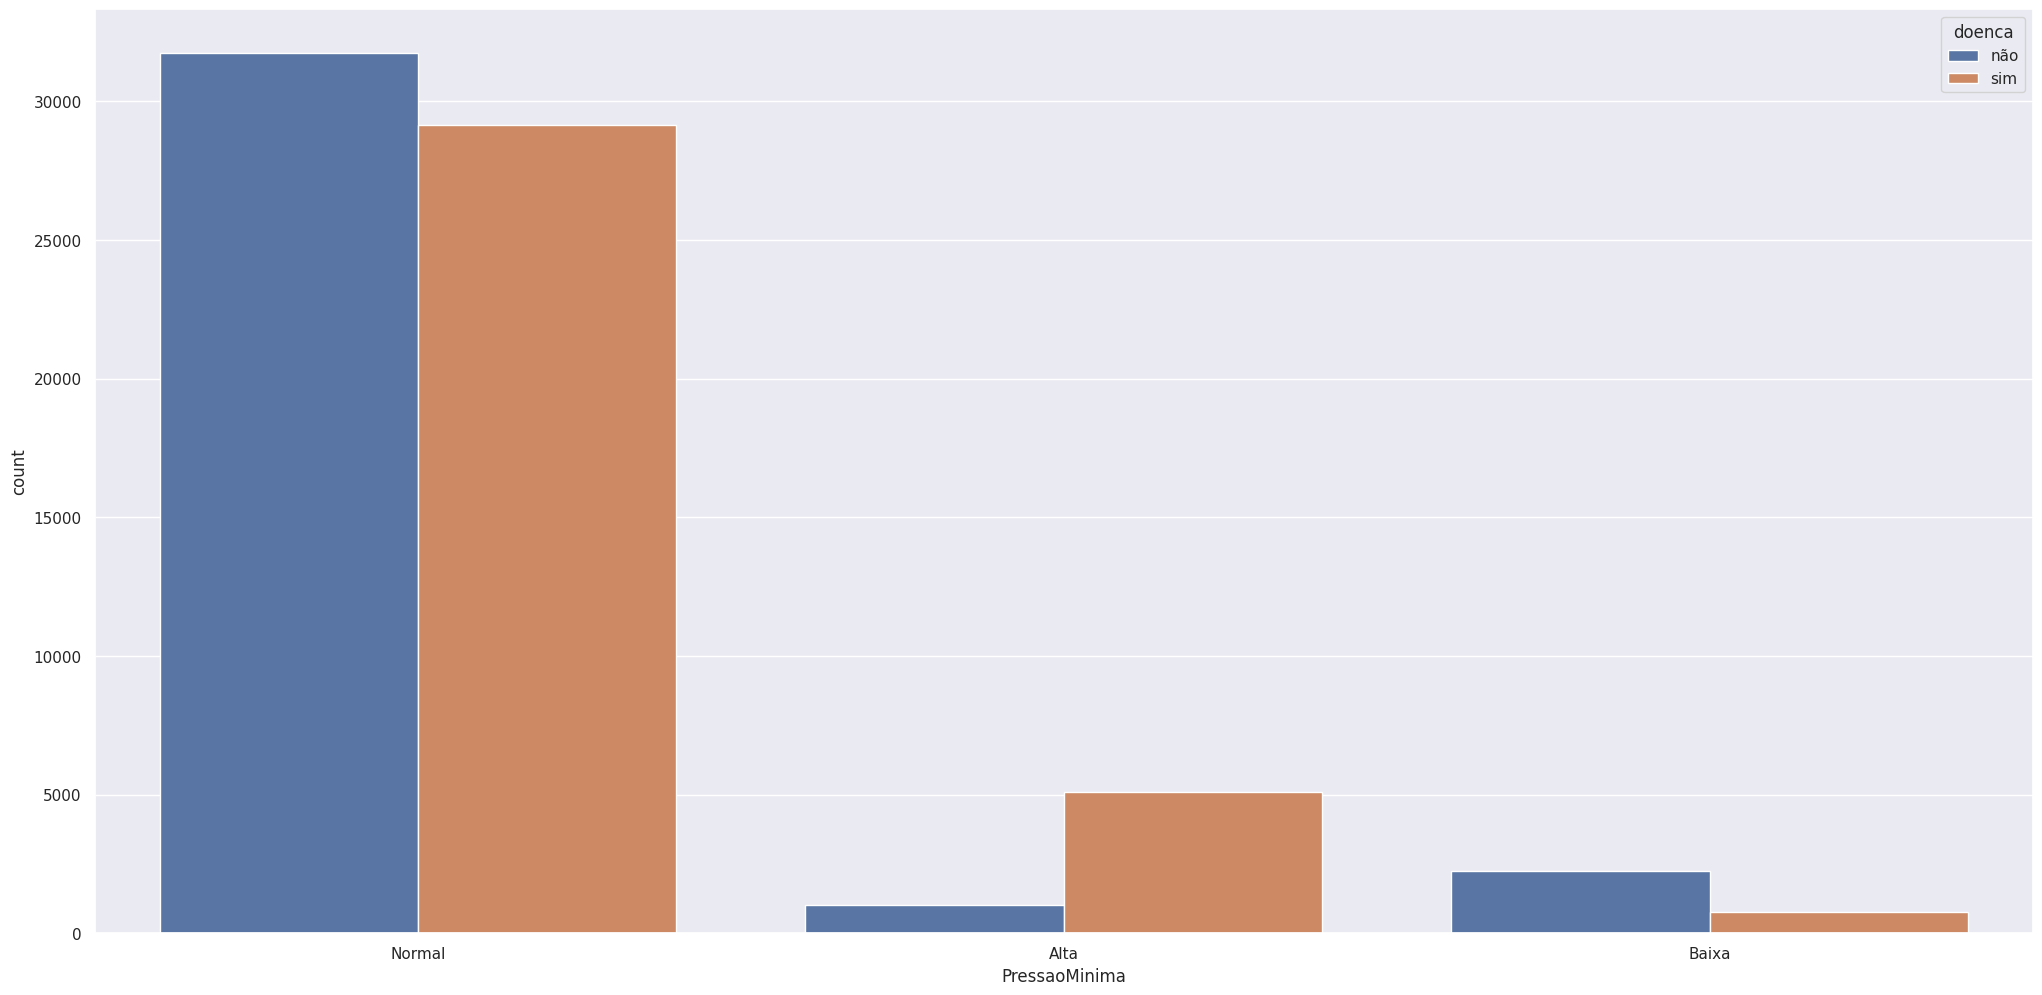

In [ ]:
sns.countplot(x="PressaoMinima", data=df, hue="doenca");

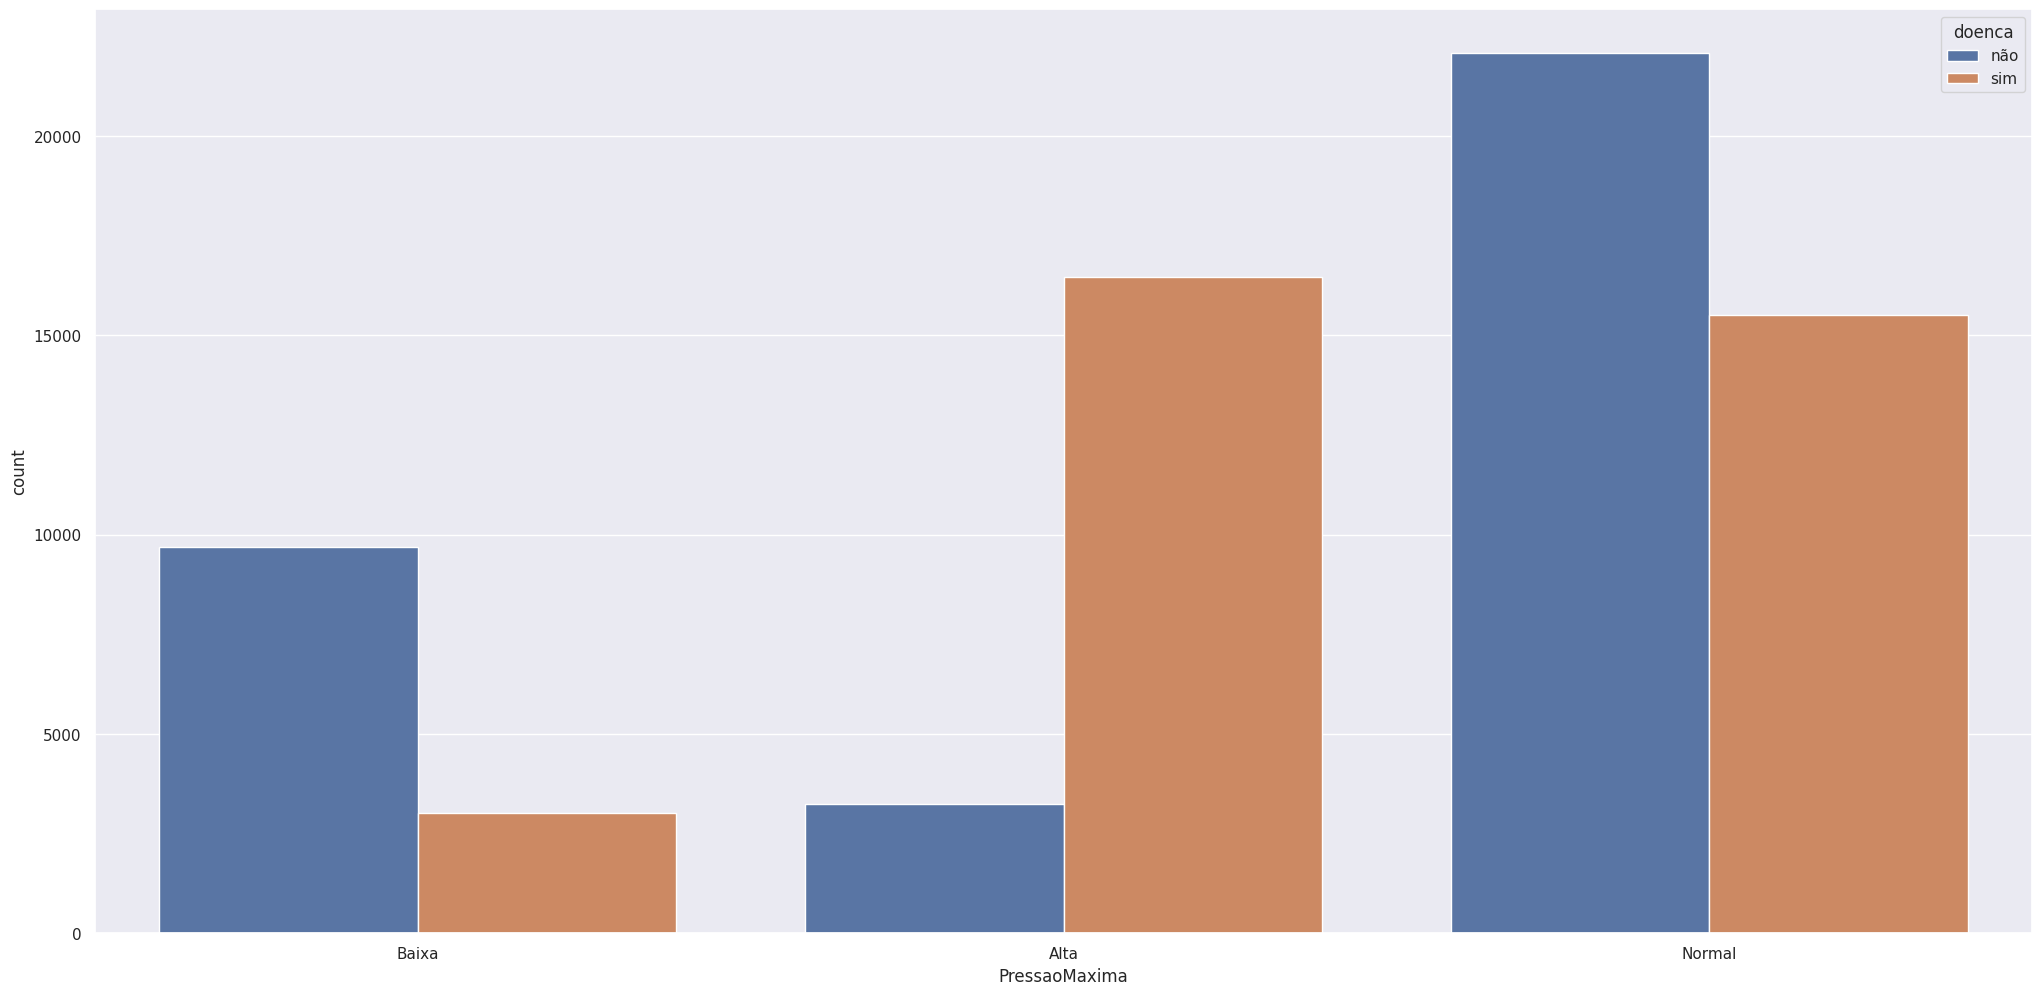

In [ ]:
sns.countplot(x="PressaoMaxima", data=df, hue="doenca");

**3.3.2 Hipótese 5**

**Quem não faz atividade física pode ficar doente**

**Verdade**

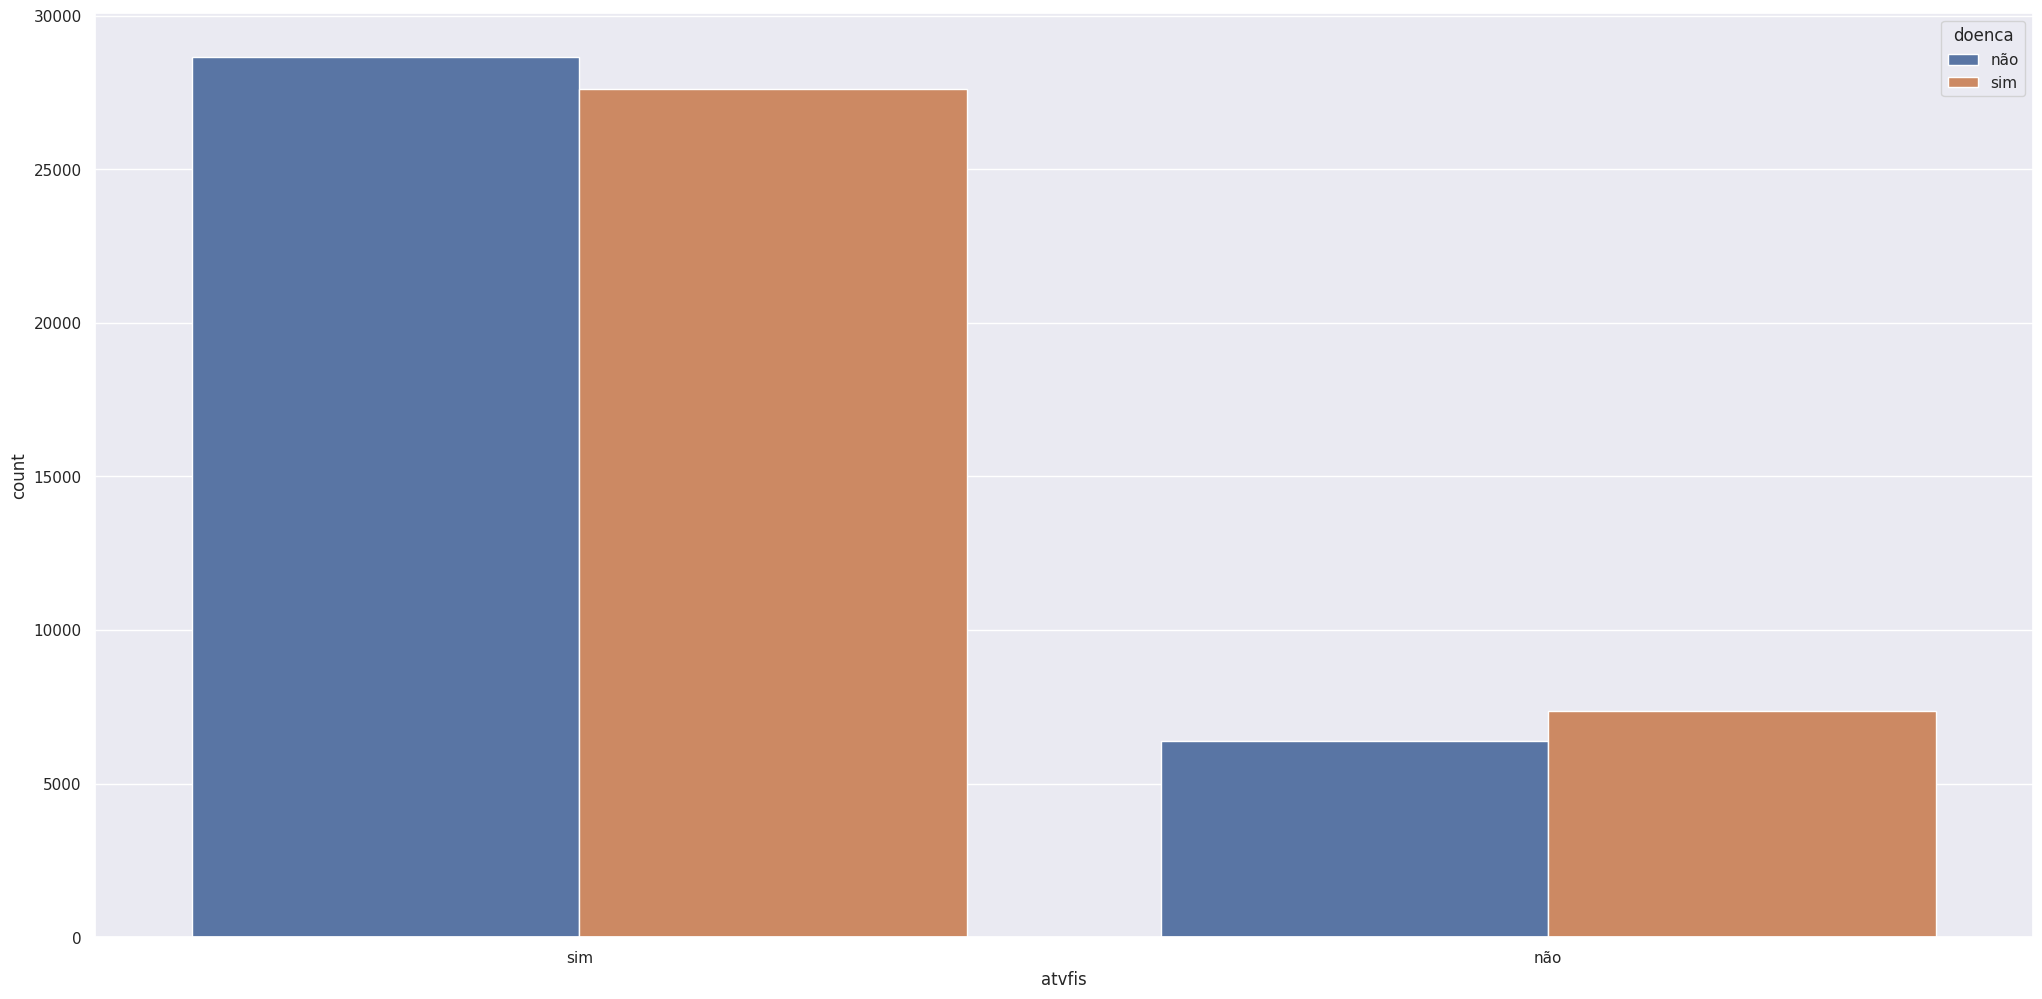

In [ ]:
sns.countplot(x="atvfis", data=df, hue="doenca");

**3.3.6 Hipótese 6**

Quanto mais obesa uma pessoa for, maior será a chance de adoecer.

**Verdade**

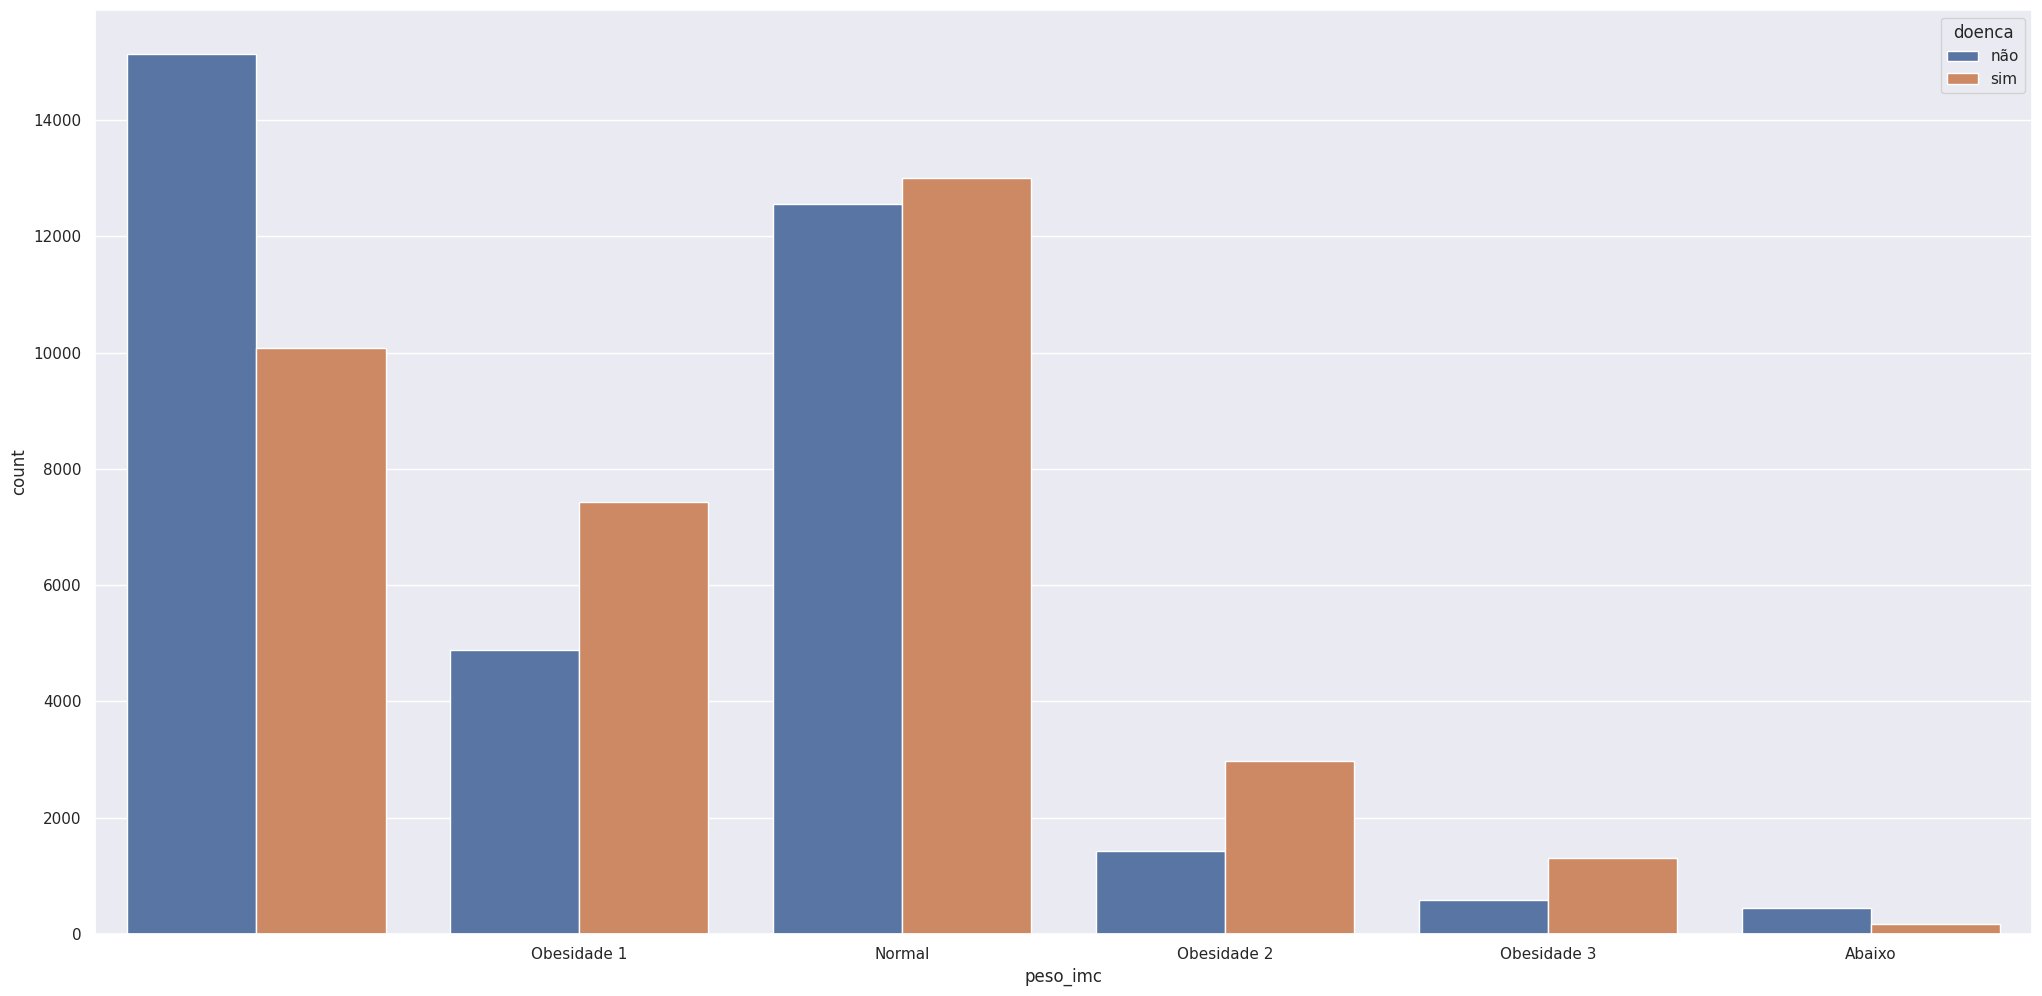

In [ ]:
sns.countplot(x="peso_imc", data=df, hue="doenca");

**3.4 Grafico Correlação Numérica**

Criando um grafico de correlação entre as variaveis numéricas.

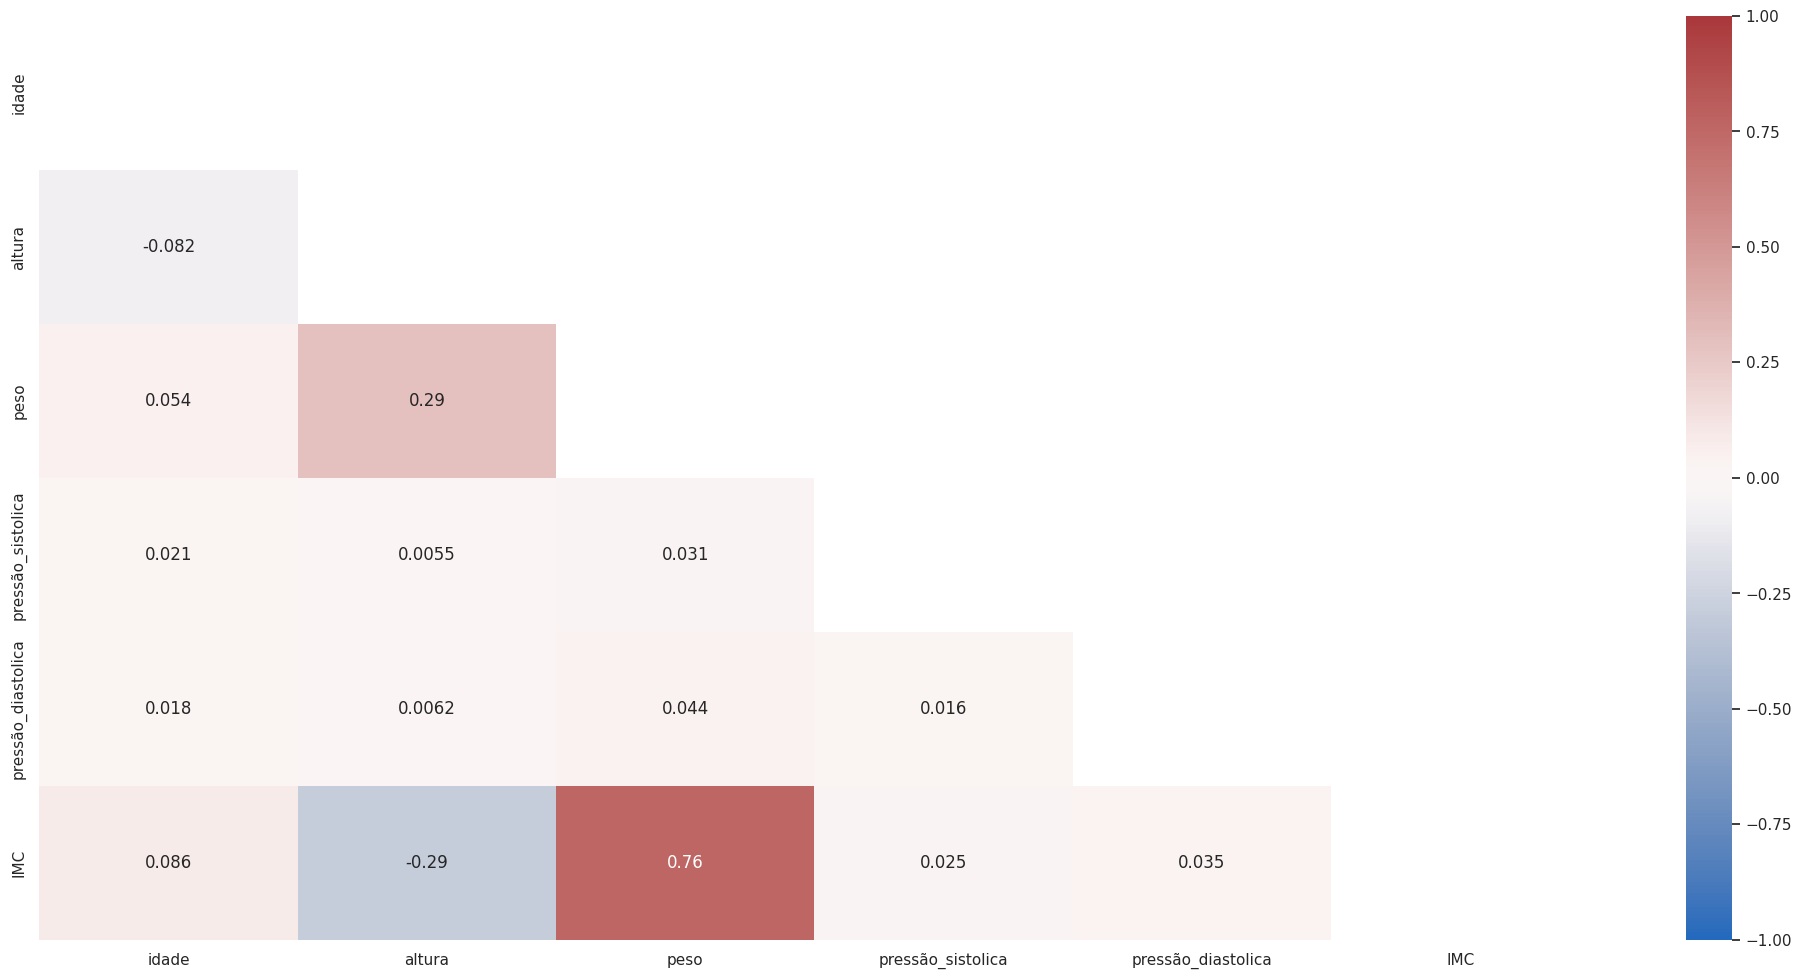

In [ ]:
cat = df.select_dtypes(exclude="object").drop("id", axis=1)
corr = cat.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots()
    ax = sns.heatmap(corr, annot=True, vmax=1, vmin=-1, mask=mask, center=0, cmap="vlag");

Conseguimos ver que a variavel peso e altura tem uma boa correlação, e a variavel IMC e peso também tem uma boa correlaao entre si. Pressão sistolica e diastolica relacionado com IMC também tem uma correlação, mas mais fraca.

# 4.0 Modelo de Machine Learning

**4.1 Carregando DataFrame**

In [ ]:
df2 = pd.read_csv("cardio_train.csv", sep=";", low_memory=False)

In [ ]:
df2.columns = ["id", "idade", "sexo", "altura", "peso", "pressão_sistolica", "pressão_diastolica", "colesterol", "glicose", "fumante", "alcoolismo", "atvfis", "doenca"]

**4.2 Dividindo os dados**

In [ ]:
# Seleciona os recursos (features) e o alvo (target)
features = ['idade', 'atvfis', 'altura', 'colesterol', 'pressão_sistolica', 'pressão_diastolica']
target = 'doenca'

X = df2[features]
y = df2[target]

# Divide os dados em conjuntos de treinamento e teste (80% treinamento, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**4.3 Reescalando colunas**

O reescalonamento é importante para tornar a previsão mais rápida e para garantir que cada característica contribua igualmente para o aprendizado do modelo. No entanto, pode haver muitos valores discrepantes nos dados. Nesta etapa, usarei um método chamado robust scaler para lidar com esses valores discrepantes.

In [ ]:
rbs = RobustScaler()
rescale_columns = ['idade', 'atvfis', 'altura', 'colesterol', 'pressão_sistolica', 'pressão_diastolica']

X_train[rescale_columns] = rbs.fit_transform(X_train[rescale_columns])
X_test[rescale_columns] = rbs.transform(X_test[rescale_columns])

**4.4 Machine Learning**

**4.4.1 Random Forest**

Criando o modelo Random Forest e usando o GridSearchCV para definir os melhores hiperparametros para o modelo, para assim melhorar as métricas do modelo.

In [ ]:
# Define os hiperparâmetros para o GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}

# Cria um objeto RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)

# Cria o objeto GridSearchCV
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Treina o modelo usando GridSearchCV
grid_search.fit(X_train.sample(n=1000, random_state=42), y_train.sample(n=1000, random_state=42))

# Exibe os melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros encontrados:")
print(grid_search.best_params_)

# Avalia o desempenho do modelo nos dados de teste
accuracy = grid_search.best_estimator_.score(X_test, y_test)
print("Acurácia do modelo nos dados de teste:", accuracy)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Melhores hiperparâmetros encontrados:
{'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Acurácia do modelo nos dados de teste: 0.7125


4.4.1 Métricas de avaliação

Exibirei as métricas de avaliação do modelo, para entendermos melhor o quão importante o modelo está para entender nossa variavel resposta (doença cardiovascular)

In [ ]:
# Prediz os rótulos para os dados de teste
y_pred = grid_search.best_estimator_.predict(X_test)

# Calcula a acurácia
accuracy = accuracy_score(y_test, y_pred)

# Calcula a precisão
precision = precision_score(y_test, y_pred)

# Calcula a revocação
recall = recall_score(y_test, y_pred)

# Calcula o F1-Score
f1 = f1_score(y_test, y_pred)

# Exibe as métricas de avaliação
print("Acurácia_RF:", accuracy)
print("Precisão_RF:", precision)
print("Revocação_RF:", recall)
print("F1-Score_RF:", f1)

Acurácia_RF: 0.7125
Precisão_RF: 0.7224125093075204
Revocação_RF: 0.6918140330861381
F1-Score_RF: 0.7067822539520652


**DataFrame com métricas**

Criei um DataFrame com as métricas de avaliação, para posteriormente compreendermos melhor nossas métricas .

In [ ]:
# Calcula as métricas de avaliação
metrics = {
    "Acurácia_RF": accuracy,
    "Precisão_RF": precision,
    "Revocação_RF": recall,
    "F1-Score_RF": f1
}

# Cria um DataFrame a partir das métricas
df_metrics = pd.DataFrame.from_dict(metrics, orient='index', columns=['Valor'])

# Exibe a tabela
print(df_metrics)

                 Valor
Acurácia_RF   0.712500
Precisão_RF   0.722413
Revocação_RF  0.691814
F1-Score_RF   0.706782


**Entendendo melhor a diferença entre os valores preditos e os reais RANDOM FOREST**

<Axes: xlabel='predict', ylabel='count'>

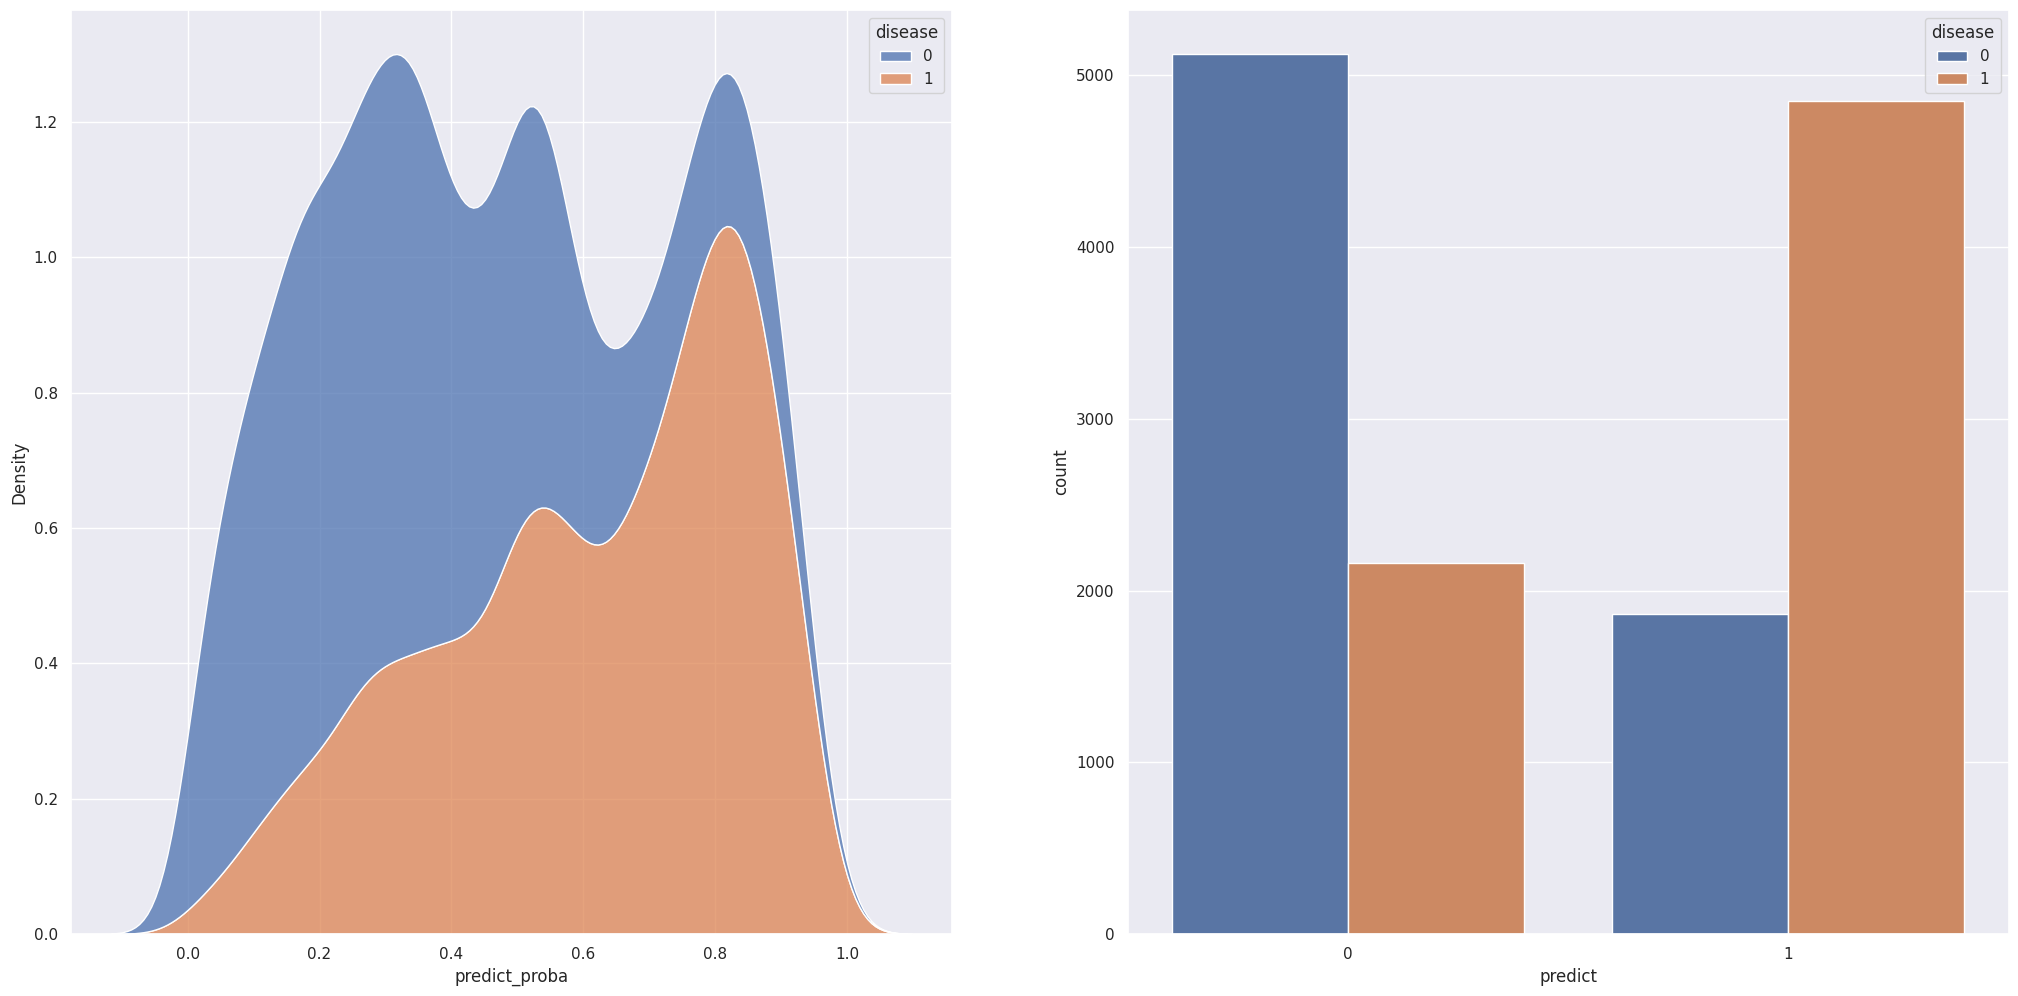

In [ ]:
# Prever as probabilidades e os rótulos para os dados de teste
y_prob = grid_search.best_estimator_.predict_proba(X_test)
y_pred = grid_search.best_estimator_.predict(X_test)

# Criar um DataFrame com as previsões e probabilidades
aux1 = pd.DataFrame({'predict': y_pred, 'predict_proba': y_prob[:, 1], 'disease': y_test})

# Plotar o gráfico de densidade (KDE plot)
plt.subplot(1, 2, 1)
sns.kdeplot(x='predict_proba', hue='disease', data=aux1, multiple="stack")

# Plotar o gráfico de contagem (count plot)
plt.subplot(1, 2, 2)
sns.countplot(x='predict', hue='disease', data=aux1)

**Matriz de Confusão RANDOM FOREST**

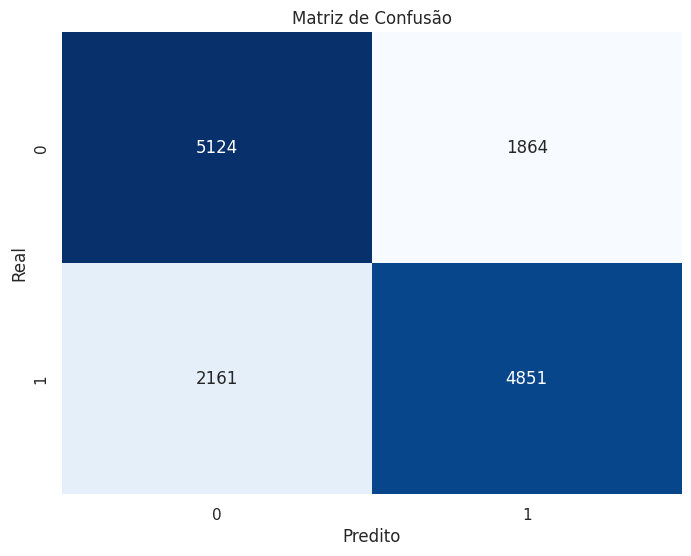

In [ ]:
# Prediz os rótulos para os dados de teste
y_pred = grid_search.best_estimator_.predict(X_test)

# Calcula a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matriz de Confusão")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()

A análise da matriz de confusão revela que o modelo tem uma acurácia de aproximadamente 71,3%, significando que ele faz a previsão correta na maioria das vezes. Com uma precisão de 72,3%, o modelo acerta 72,3% das vezes que prevê uma classe positiva. O recall de 69,2% indica que ele identifica corretamente 69,2% de todos os casos positivos reais. O F1-Score de 70,7%, que equilibra precisão e recall, reflete que o modelo tem um desempenho razoavelmente equilibrado. No entanto, há margem para melhoria, especialmente na redução de falsos negativos e falsos positivos, para aumentar a confiabilidade geral das previsões.

**4.4.2 Modelo XGBoost**

In [ ]:
# Cria o objeto XGBClassifier
xgb_clf = XGBClassifier(random_state=42)

# Define os hiperparâmetros para o GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.3],
    'subsample': [0.7, 0.8],
    'colsample_bytree': [0.7, 0.8],
    'reg_alpha': [0, 0.1],
    'reg_lambda': [1, 1.5]
}

# Configuração do GridSearchCV
grid_search = GridSearchCV(estimator=xgb_clf,
                           param_grid=param_grid,
                           cv=2,
                           n_jobs=1,
                           verbose=2)

# Treina o modelo usando GridSearchCV
grid_search.fit(X_train, y_train)

print("Melhores hiperparâmetros encontrados:")
print(grid_search.best_params_)

Fitting 2 folds for each of 128 candidates, totalling 256 fits
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.7; total time=   2.0s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1.5, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1.5, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=100, 

**Criando as métricas XGBoost**

In [ ]:
best_model = grid_search.best_estimator_

# Fazer previsões no conjunto de teste
y_pred = best_model.predict(X_test)

# Calcular as métricas
accuracy_XG = accuracy_score(y_test, y_pred)
precision_XG = precision_score(y_test, y_pred)
recall_XG = recall_score(y_test, y_pred)
f1_XG = f1_score(y_test, y_pred)

metricas_XG = pd.DataFrame({
    "Métrica": ["Acurácia_XG", "Precisão_XG", "Revocação_XG", "F1-Score_XG"],
    "Valor": [accuracy_XG, precision_XG, recall_XG, f1_XG]
})

In [ ]:
print(metricas_XG)

        Métrica     Valor
0   Acurácia_XG  0.737643
1   Precisão_XG  0.758157
2  Revocação_XG  0.699230
3   F1-Score_XG  0.727502


**ENTENDENDO MELHOR A DIFERENÇA ENTRE OS VALORES PREDITOS E OS REAIS**

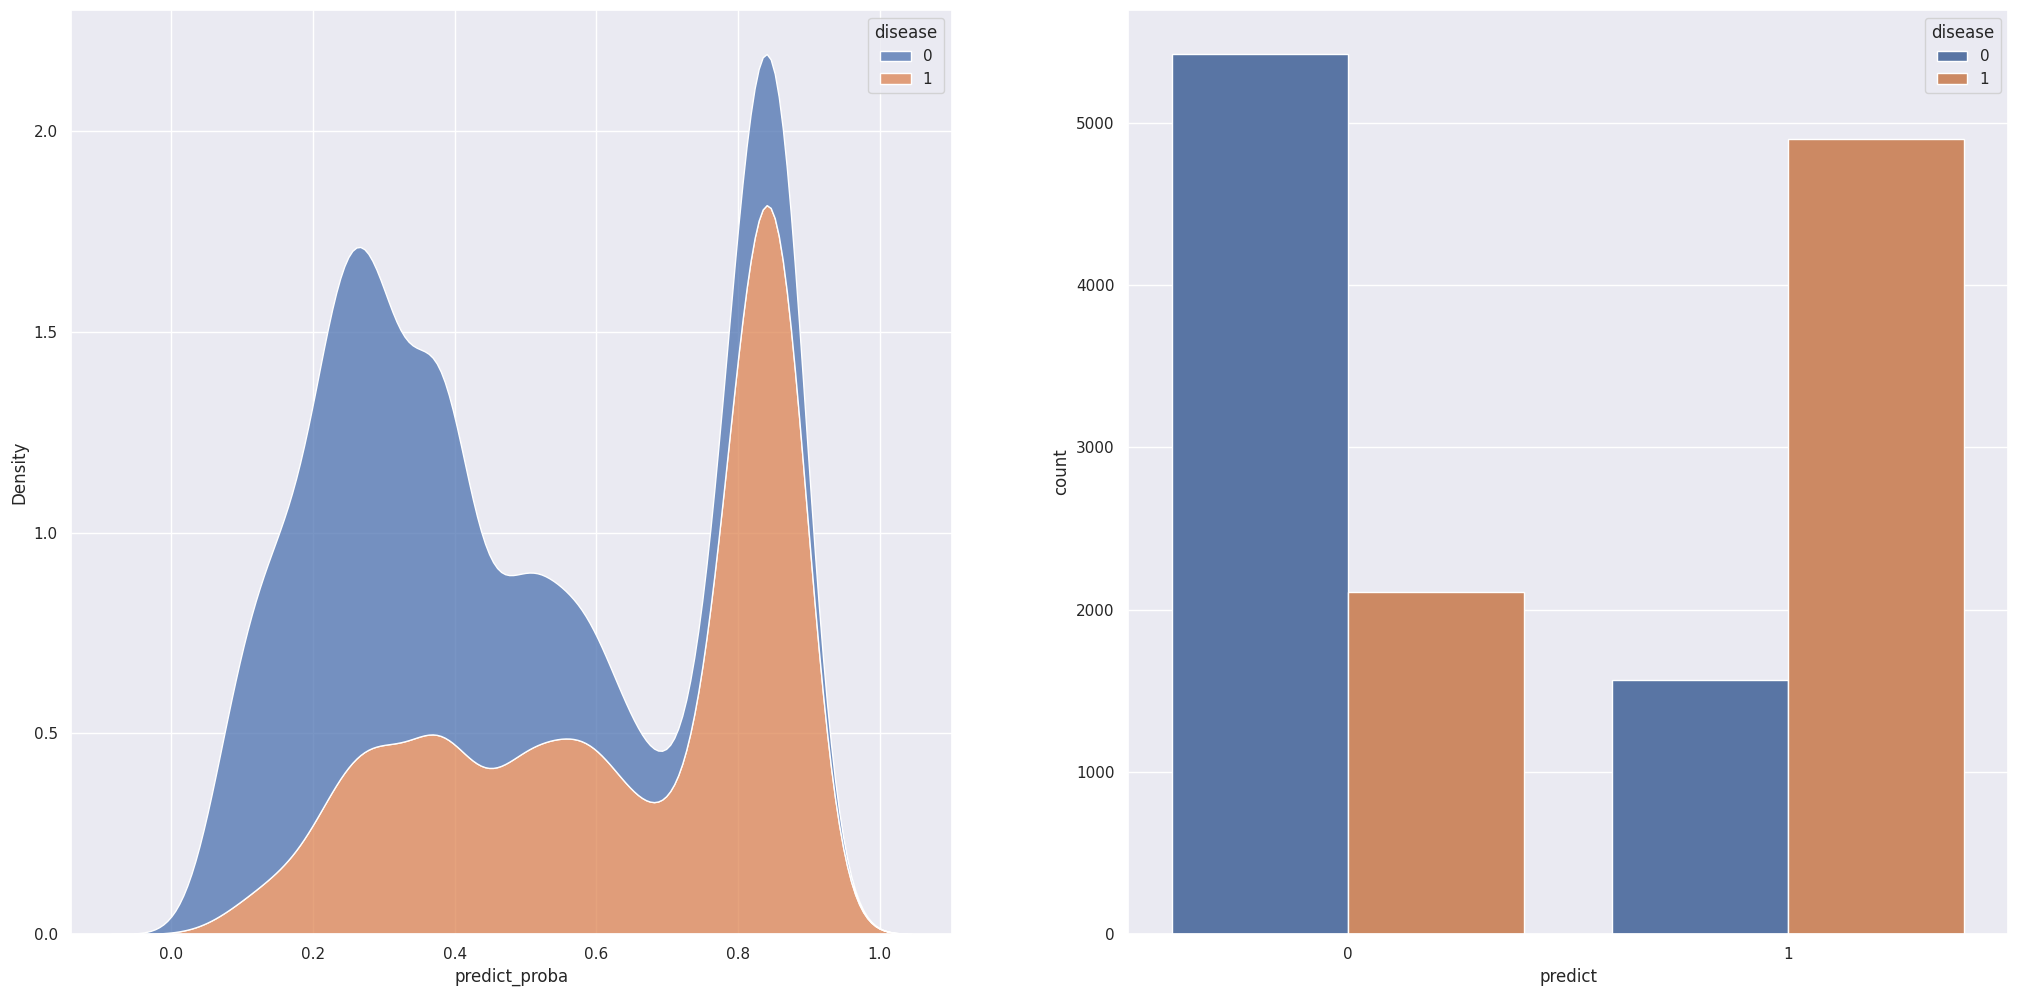

In [ ]:
y_prob_xgb = grid_search.best_estimator_.predict_proba(X_test)
y_pred_xgb = grid_search.best_estimator_.predict(X_test)

# Criar um DataFrame com as previsões e probabilidades
aux_xgb = pd.DataFrame({'predict': y_pred_xgb, 'predict_proba': y_prob_xgb[:, 1], 'disease': y_test})

# Plotar o gráfico de densidade (KDE plot)
plt.subplot(1, 2, 1)
sns.kdeplot(x='predict_proba', hue='disease', data=aux_xgb, multiple="stack")

# Plotar o gráfico de contagem (count plot)
plt.subplot(1, 2, 2)
sns.countplot(x='predict', hue='disease', data=aux_xgb)

plt.show()

**MATRIZ DE CONFUSÃO XGBOOST**

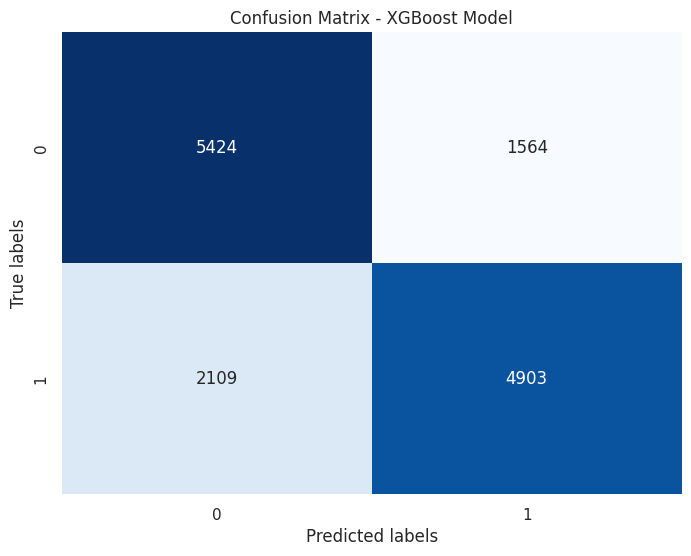

In [ ]:
# Calcular a matriz de confusão
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - XGBoost Model')
plt.show()

A análise da matriz de confusão revela que o modelo apresenta uma acurácia de aproximadamente 74,3%, indicando que ele acerta a maioria das previsões. A precisão de 75,8% sugere que, das previsões positivas feitas pelo modelo, 75,8% estavam corretas. O recall de 69,9% indica que o modelo consegue identificar 69,9% dos casos positivos reais. O F1-Score, que é a média harmônica entre precisão e recall, está em 72,7%, refletindo um equilíbrio entre a capacidade do modelo de identificar corretamente os positivos e a precisão das suas previsões positivas. Esses resultados mostram que, embora o modelo tenha um desempenho geral bom, ainda há espaço para melhorias, especialmente na redução dos falsos negativos e positivos.

**4.5 Comparação entre os modelos**

In [ ]:
display(metricas_XG, df_metrics)

,Métrica,Valor
0,Acurácia_XG,0.737643
1,Precisão_XG,0.758157
2,Revocação_XG,0.699230
3,F1-Score_XG,0.727502


,Valor
Acurácia_RF,0.712500
Precisão_RF,0.722413
Revocação_RF,0.691814
F1-Score_RF,0.706782
